# Beer Style - Formatting

In [333]:
pwd

'/Users/kelly/metis_v3/Project_3'

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
beer_data = pd.read_csv('recipeData.csv', encoding = 'latin-1')

In [6]:
beer_data.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [7]:
beer_data.shape

(73861, 23)

In [8]:
beer_data.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

In [9]:
beer_data.dtypes

BeerID             int64
Name              object
URL               object
Style             object
StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
PrimingMethod     object
PrimingAmount     object
UserId           float64
dtype: object

In [10]:
beer_data.isna().sum()

BeerID               0
Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64

In [11]:
#Drop columns with >30% N/A's

beer_data.drop(columns = ['MashThickness', 'PitchRate', 'PrimaryTemp', 'PrimingMethod', 'PrimingAmount','UserId'], inplace = True)

In [12]:
beer_data.drop(columns = ['URL','SugarScale'], inplace = True)

In [13]:
beer_data.head()

,BeerID,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,BrewMethod
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,All Grain
1,2,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,All Grain
2,3,Zombie Dust Clone - EXTRACT,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,extract
3,4,Zombie Dust Clone - ALL GRAIN,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,All Grain
4,5,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,All Grain


In [14]:
beer_data.isna().sum()

BeerID            0
Name              1
Style           596
StyleID           0
Size(L)           0
OG                0
FG                0
ABV               0
IBU               0
Color             0
BoilSize          0
BoilTime          0
BoilGravity    2990
Efficiency        0
BrewMethod        0
dtype: int64

In [15]:
boilgravity_mask = beer_data.BoilGravity.isna() == False

In [16]:
beer_data = beer_data[boilgravity_mask]

In [17]:
beer_data.shape

(70871, 15)

In [18]:
beer_data.isna().sum()

BeerID           0
Name             1
Style          354
StyleID          0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
BrewMethod       0
dtype: int64

In [19]:
beer_data[beer_data['Style'].isna()]

,BeerID,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,BrewMethod
87,88,Zatarain's Root Beer - Non-Alcoholic keg in...,NaN,111,18.93,1.0460,1.01300,4.27,0.00,3.99,11.36,0,1.077,100.0,BIAB
577,578,Nanny state,NaN,111,20.00,1.0080,1.00600,0.30,55.43,11.39,25.00,60,1.006,70.0,All Grain
3755,3756,Kjeller 5 Hop Bursted Pale Ale 25 L,NaN,111,25.00,1.0510,1.00900,5.56,36.21,5.47,28.00,60,1.046,70.0,All Grain
3950,3951,Non-alcoholic Root beer -POP,NaN,111,19.87,1.0420,1.01300,3.71,0.00,6.64,11.36,60,1.073,35.0,extract
4575,4576,Forty Six and Two,NaN,111,24.61,1.0660,1.01700,6.54,71.92,40.00,30.28,90,1.054,70.0,All Grain
5240,5241,Hadopelagic,NaN,111,24.61,1.0970,1.02300,9.72,89.58,40.00,30.28,90,1.079,72.0,All Grain
5261,5262,English Amber Ale,NaN,111,4.00,1.0500,1.01200,4.96,19.90,19.25,5.00,60,1.040,44.0,All Grain
5490,5491,Kellerbier,NaN,111,17.03,1.0650,1.01500,6.57,13.08,3.89,22.71,60,1.049,70.0,All Grain
7681,7682,Brewmasters Reserve Oktoberfest,NaN,111,47.32,1.0430,1.01000,4.27,44.55,11.16,45.42,60,1.044,75.0,All Grain
8186,8187,Rye & Wheat Beer,NaN,111,20.00,1.0660,1.01800,6.21,13.34,5.13,10.00,60,1.131,92.0,BIAB


In [20]:
#Remove all Style NaN 111

beer_data = beer_data[beer_data['StyleID'] != 111]

In [21]:
beer_data.shape

(70517, 15)

In [22]:
beer_data.isna().sum()

BeerID         0
Name           1
Style          0
StyleID        0
Size(L)        0
OG             0
FG             0
ABV            0
IBU            0
Color          0
BoilSize       0
BoilTime       0
BoilGravity    0
Efficiency     0
BrewMethod     0
dtype: int64

In [23]:
beer_data.columns

Index(['BeerID', 'Name', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG', 'ABV',
       'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency',
       'BrewMethod'],
      dtype='object')

In [24]:
#Create one-hot encoded version of brew method

beer_data = beer_data.join(pd.get_dummies(beer_data['BrewMethod']))

In [25]:
beer_data.rename(columns = {'All Grain':'AllGrain', 'Partial Mash': 'PartialMash'}, inplace = True)

In [26]:
beer_data.head()

,BeerID,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,BrewMethod,AllGrain,BIAB,PartialMash,extract
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,All Grain,1,0,0,0
1,2,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,All Grain,1,0,0,0
4,5,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,All Grain,1,0,0,0
5,6,Sierra Nevada Pale Ale Clone,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,All Grain,1,0,0,0
7,8,Spotted Clown (New Glarus Spotted Cow clone),Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0,All Grain,1,0,0,0


In [27]:
#Create new csv with formatted df to use in psql

beer_data.to_csv('recipeData_formatted.csv', index = False, sep = ',')

In [28]:
pd.read_csv('recipeData_formatted.csv').dtypes

BeerID           int64
Name            object
Style           object
StyleID          int64
Size(L)        float64
OG             float64
FG             float64
ABV            float64
IBU            float64
Color          float64
BoilSize       float64
BoilTime         int64
BoilGravity    float64
Efficiency     float64
BrewMethod      object
AllGrain         int64
BIAB             int64
PartialMash      int64
extract          int64
dtype: object

In [29]:
pd.read_csv('recipeData_formatted.csv').head()

,BeerID,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,BrewMethod,AllGrain,BIAB,PartialMash,extract
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,All Grain,1,0,0,0
1,2,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,All Grain,1,0,0,0
2,5,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,All Grain,1,0,0,0
3,6,Sierra Nevada Pale Ale Clone,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,All Grain,1,0,0,0
4,8,Spotted Clown (New Glarus Spotted Cow clone),Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0,All Grain,1,0,0,0


Look at Beer Styles:

In [30]:
beer_data.Style.value_counts()

American IPA                         11544
American Pale Ale                     7328
Saison                                2528
American Light Lager                  2277
American Amber Ale                    1937
Blonde Ale                            1693
Imperial IPA                          1344
American Stout                        1208
Irish Red Ale                         1145
American Brown Ale                    1080
Witbier                               1028
California Common Beer                1012
Weissbier                              988
Oatmeal Stout                          909
Sweet Stout                            876
Russian Imperial Stout                 872
Double IPA                             864
Kölsch                                 840
Weizen/Weissbier                       837
Robust Porter                          819
Cream Ale                              790
American Porter                        787
English IPA                            756
Imperial St

In [31]:
beer_data[beer_data.Style == 'Gose']

,BeerID,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,BrewMethod,AllGrain,BIAB,PartialMash,extract
763,764,Gose to 11,Gose,82,20.82,1.045,1.010,4.58,9.44,4.00,27.44,60,1.034,65.0,All Grain,1,0,0,0
910,911,Margarita Gose/Lavender Wheat,Gose,82,30.28,1.035,1.006,3.84,12.11,3.64,39.75,40,1.027,59.0,All Grain,1,0,0,0
1771,1772,Citra and Lime Gose,Gose,82,19.00,1.043,1.008,4.64,8.82,3.00,28.50,15,1.029,75.0,BIAB,0,1,0,0
2564,2565,Fruit Gose,Gose,82,21.00,1.045,1.011,4.39,11.84,3.38,28.50,60,1.033,65.0,All Grain,1,0,0,0
3176,3177,27-.Gose(??),Gose,82,21.00,1.050,1.010,5.28,15.13,3.15,28.00,60,1.038,76.0,All Grain,1,0,0,0
3454,3455,German Gose Partial Mash,Gose,82,18.93,1.068,1.015,6.93,29.07,4.98,15.14,60,1.085,70.0,Partial Mash,0,0,1,0
3626,3627,Blood Orange Gose,Gose,82,20.82,1.044,1.008,4.74,0.00,3.42,20.82,0,1.044,68.0,All Grain,1,0,0,0
3689,3690,Charlie's Jerkin' Gherkin' Dill Pickle Gose...,Gose,82,20.82,1.050,1.014,4.69,8.38,3.81,11.36,60,1.092,35.0,extract,0,0,0,1
3820,3821,Mango gose,Gose,82,22.71,1.051,1.009,5.50,11.75,3.91,30.28,60,1.038,58.0,All Grain,1,0,0,0
4321,4322,Gose,Gose,82,14.20,1.047,1.007,5.35,5.76,3.02,17.03,60,1.037,100.0,All Grain,1,0,0,0


In [32]:
beer_style = pd.read_csv('styleData.csv', encoding = 'latin-1')

In [33]:
beer_style.head()

,Style,StyleID
0,Altbier,1
1,Alternative Grain Beer,2
2,Alternative Sugar Beer,3
3,American Amber Ale,4
4,American Barleywine,5


In [34]:
beer_style['IPA'] = np.where(beer_style['Style'].str.contains('IPA', regex = False), 1, 0) 

In [35]:
beer_style['Lager'] = np.where(beer_style['Style'].str.contains('Lager', regex = False), 1, 0)
beer_style['Stout'] = np.where(beer_style['Style'].str.contains('Stout', regex = False), 1, 0)
beer_style['Porter'] = np.where(beer_style['Style'].str.contains('Porter', regex = False), 1, 0)
beer_style['Cider'] = np.where(beer_style['Style'].str.contains('Cider', regex = False), 1, 0)
beer_style['Saison'] = np.where(beer_style['Style'].str.contains('Saison', regex = False), 1, 0)
beer_style['Kölsch'] = np.where(beer_style['Style'].str.contains('Kölsch', regex = False), 1, 0)
beer_style['Ale'] = np.where(beer_style['Style'].str.contains('Ale', regex = False), 1, 0)
beer_style['Gose'] = np.where(beer_style['Style'].str.contains('Gose', regex = False), 1, 0)
beer_style['Barleywine'] = np.where(beer_style['Style'].str.contains('Barleywine', regex = False), 1, 0)


In [36]:
beer_style['APA'] = np.where(beer_style['Style'].str.contains('American Pale Ale', regex = False), 1, 0)
beer_style['Ale'] = np.subtract(beer_style['Ale'], beer_style['APA'])

In [37]:
beer_style['Wheat'] = np.add(np.add(
            np.where(beer_style['Style'].str.contains('Wheat', regex = False), 1, 0), 
            np.where(beer_style['Style'].str.contains('Witbier', regex = False), 1, 0)),
            np.where(beer_style['Style'].str.contains('Weiss', regex = False), 1, 0))

In [38]:
beer_style['Pilsner'] = np.add(
            np.where(beer_style['Style'].str.contains('Pilsner', regex = False), 1, 0), 
            np.where(beer_style['Style'].str.contains('Pilsener', regex = False), 1, 0))
            

In [39]:
beer_style.tail(50)

,Style,StyleID,IPA,Lager,Stout,Porter,Cider,Saison,Kölsch,Ale,Gose,Barleywine,APA,Wheat,Pilsner
126,Pyment (Grape Melomel),127,0,0,0,0,0,0,0,0,0,0,0,0,0
127,Rauchbier,128,0,0,0,0,0,0,0,0,0,0,0,0,0
128,Robust Porter,129,0,0,0,1,0,0,0,0,0,0,0,0,0
129,Roggenbier,130,0,0,0,0,0,0,0,0,0,0,0,0,0
130,Roggenbier (German Rye Beer),131,0,0,0,0,0,0,0,0,0,0,0,0,0
131,Russian Imperial Stout,132,0,0,1,0,0,0,0,0,0,0,0,0,0
132,Sahti,133,0,0,0,0,0,0,0,0,0,0,0,0,0
133,Saison,134,0,0,0,0,0,1,0,0,0,0,0,0,0
134,Schwarzbier,135,0,0,0,0,0,0,0,0,0,0,0,0,0
135,Scottish Export,136,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
other_beer = beer_style[(beer_style['IPA'] == 0) & (beer_style['Lager'] == 0) & (beer_style['Stout'] == 0) & (beer_style['Porter'] == 0)&(beer_style['Cider'] == 0)&(beer_style['Saison'] == 0)&(beer_style['Wheat'] == 0)&(beer_style['Kölsch'] == 0)&(beer_style['Ale'] == 0)&(beer_style['Gose'] == 0)&(beer_style['Barleywine'] == 0)&(beer_style['Pilsner'] == 0)]

In [41]:
other_beer.head()

,Style,StyleID,IPA,Lager,Stout,Porter,Cider,Saison,Kölsch,Ale,Gose,Barleywine,APA,Wheat,Pilsner
0,Altbier,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alternative Grain Beer,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Alternative Sugar Beer,3,0,0,0,0,0,0,0,0,0,0,0,0,0
9,American Pale Ale,10,0,0,0,0,0,0,0,0,0,0,1,0,0
15,Apple Wine,16,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
beer_style['Other'] = np.where(beer_style['Style'].isin(other_beer.Style), 1, 0)

In [43]:
beer_style

,Style,StyleID,IPA,Lager,Stout,Porter,Cider,Saison,Kölsch,Ale,Gose,Barleywine,APA,Wheat,Pilsner,Other
0,Altbier,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Alternative Grain Beer,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Alternative Sugar Beer,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,American Amber Ale,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,American Barleywine,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,American Brown Ale,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,American IPA,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,American Lager,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,American Light Lager,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,American Pale Ale,10,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [44]:
beer_style.Other.value_counts()

1    92
0    84
Name: Other, dtype: int64

In [45]:
print('Number of unique "Other" beer styles: ', beer_style[beer_style.Other == 1].Style.nunique())

Number of unique "Other" beer styles:  92


In [46]:
beer_style[beer_style.Other == 1].Style.unique()

array(['Altbier', 'Alternative Grain Beer', 'Alternative Sugar Beer',
       'American Pale Ale', 'Apple Wine', 'Autumn Seasonal Beer',
       'Belgian Dubbel', 'Belgian Tripel', 'Best Bitter',
       'Bière de Garde', 'Braggot', 'Brett Beer', 'California Common',
       'California Common Beer', 'Classic Rauchbier',
       'Classic Style Smoked Beer', 'Clone Beer', 'Cyser (Apple Melomel)',
       'Dusseldorf Altbier', 'Dark Mild', 'Doppelbock',
       'Dortmunder Export', 'Dry Mead', 'Dunkelweizen', 'Dunkles Bock',
       'Eisbock', 'Experimental Beer',
       'Extra Special/Strong Bitter (ESB)', 'Festbier',
       'Fruit and Spice Beer', 'Fruit Beer', 'Fruit Lambic',
       'German Helles Exportbier', 'German Leichtbier', 'German Pils',
       'Gueuze', 'Helles Bock', 'Holiday/Winter Special Spiced Beer',
       'Kellerbier: Amber Kellerbier', 'Kellerbier: Pale Kellerbier',
       'Kentucky Common', 'Lambic', 'Lichtenhainer', 'Märzen',
       'Maibock/Helles Bock', 'Metheglin', 'Mild

In [47]:
#Create new csv with formatted df to use in psql

beer_style.to_csv('styleData_formatted.csv', index = False, sep = ',')

In [48]:
beer_style_formatted = pd.read_csv('styleData_formatted.csv')

In [49]:
beer_style_formatted.head()

,Style,StyleID,IPA,Lager,Stout,Porter,Cider,Saison,Kölsch,Ale,Gose,Barleywine,APA,Wheat,Pilsner,Other
0,Altbier,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Alternative Grain Beer,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Alternative Sugar Beer,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,American Amber Ale,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,American Barleywine,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [50]:
beer_style_formatted[beer_style_formatted.Style.isnull()]

,Style,StyleID,IPA,Lager,Stout,Porter,Cider,Saison,Kölsch,Ale,Gose,Barleywine,APA,Wheat,Pilsner,Other
110,NaN,111,1,1,1,1,1,1,1,0,1,1,1,3,2,0


In [51]:
beer_style_formatted.dtypes

Style         object
StyleID        int64
IPA            int64
Lager          int64
Stout          int64
Porter         int64
Cider          int64
Saison         int64
Kölsch         int64
Ale            int64
Gose           int64
Barleywine     int64
APA            int64
Wheat          int64
Pilsner        int64
Other          int64
dtype: object

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [53]:
beer_data.head()

,BeerID,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,BrewMethod,AllGrain,BIAB,PartialMash,extract
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,All Grain,1,0,0,0
1,2,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,All Grain,1,0,0,0
4,5,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,All Grain,1,0,0,0
5,6,Sierra Nevada Pale Ale Clone,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,All Grain,1,0,0,0
7,8,Spotted Clown (New Glarus Spotted Cow clone),Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0,All Grain,1,0,0,0


In [54]:
beer_data.columns

Index(['BeerID', 'Name', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG', 'ABV',
       'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency',
       'BrewMethod', 'AllGrain', 'BIAB', 'PartialMash', 'extract'],
      dtype='object')

In [55]:
y = beer_data['Style']
X = beer_data.drop(columns = ['BeerID', 'Name', 'Style', 'StyleID', 'BrewMethod'])

In [56]:
#Check all numerical values
X.head()

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,AllGrain,BIAB,PartialMash,extract
0,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,1,0,0,0
1,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,1,0,0,0
4,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,1,0,0,0
5,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,1,0,0,0
7,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0,1,0,0,0


In [57]:
y.head()

0                             Cream Ale
1    Holiday/Winter Special Spiced Beer
4                     Belgian Blond Ale
5                     American Pale Ale
7                             Cream Ale
Name: Style, dtype: object

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444) 

In [59]:
train_df = X_train.copy()
train_df['Style'] = y_train

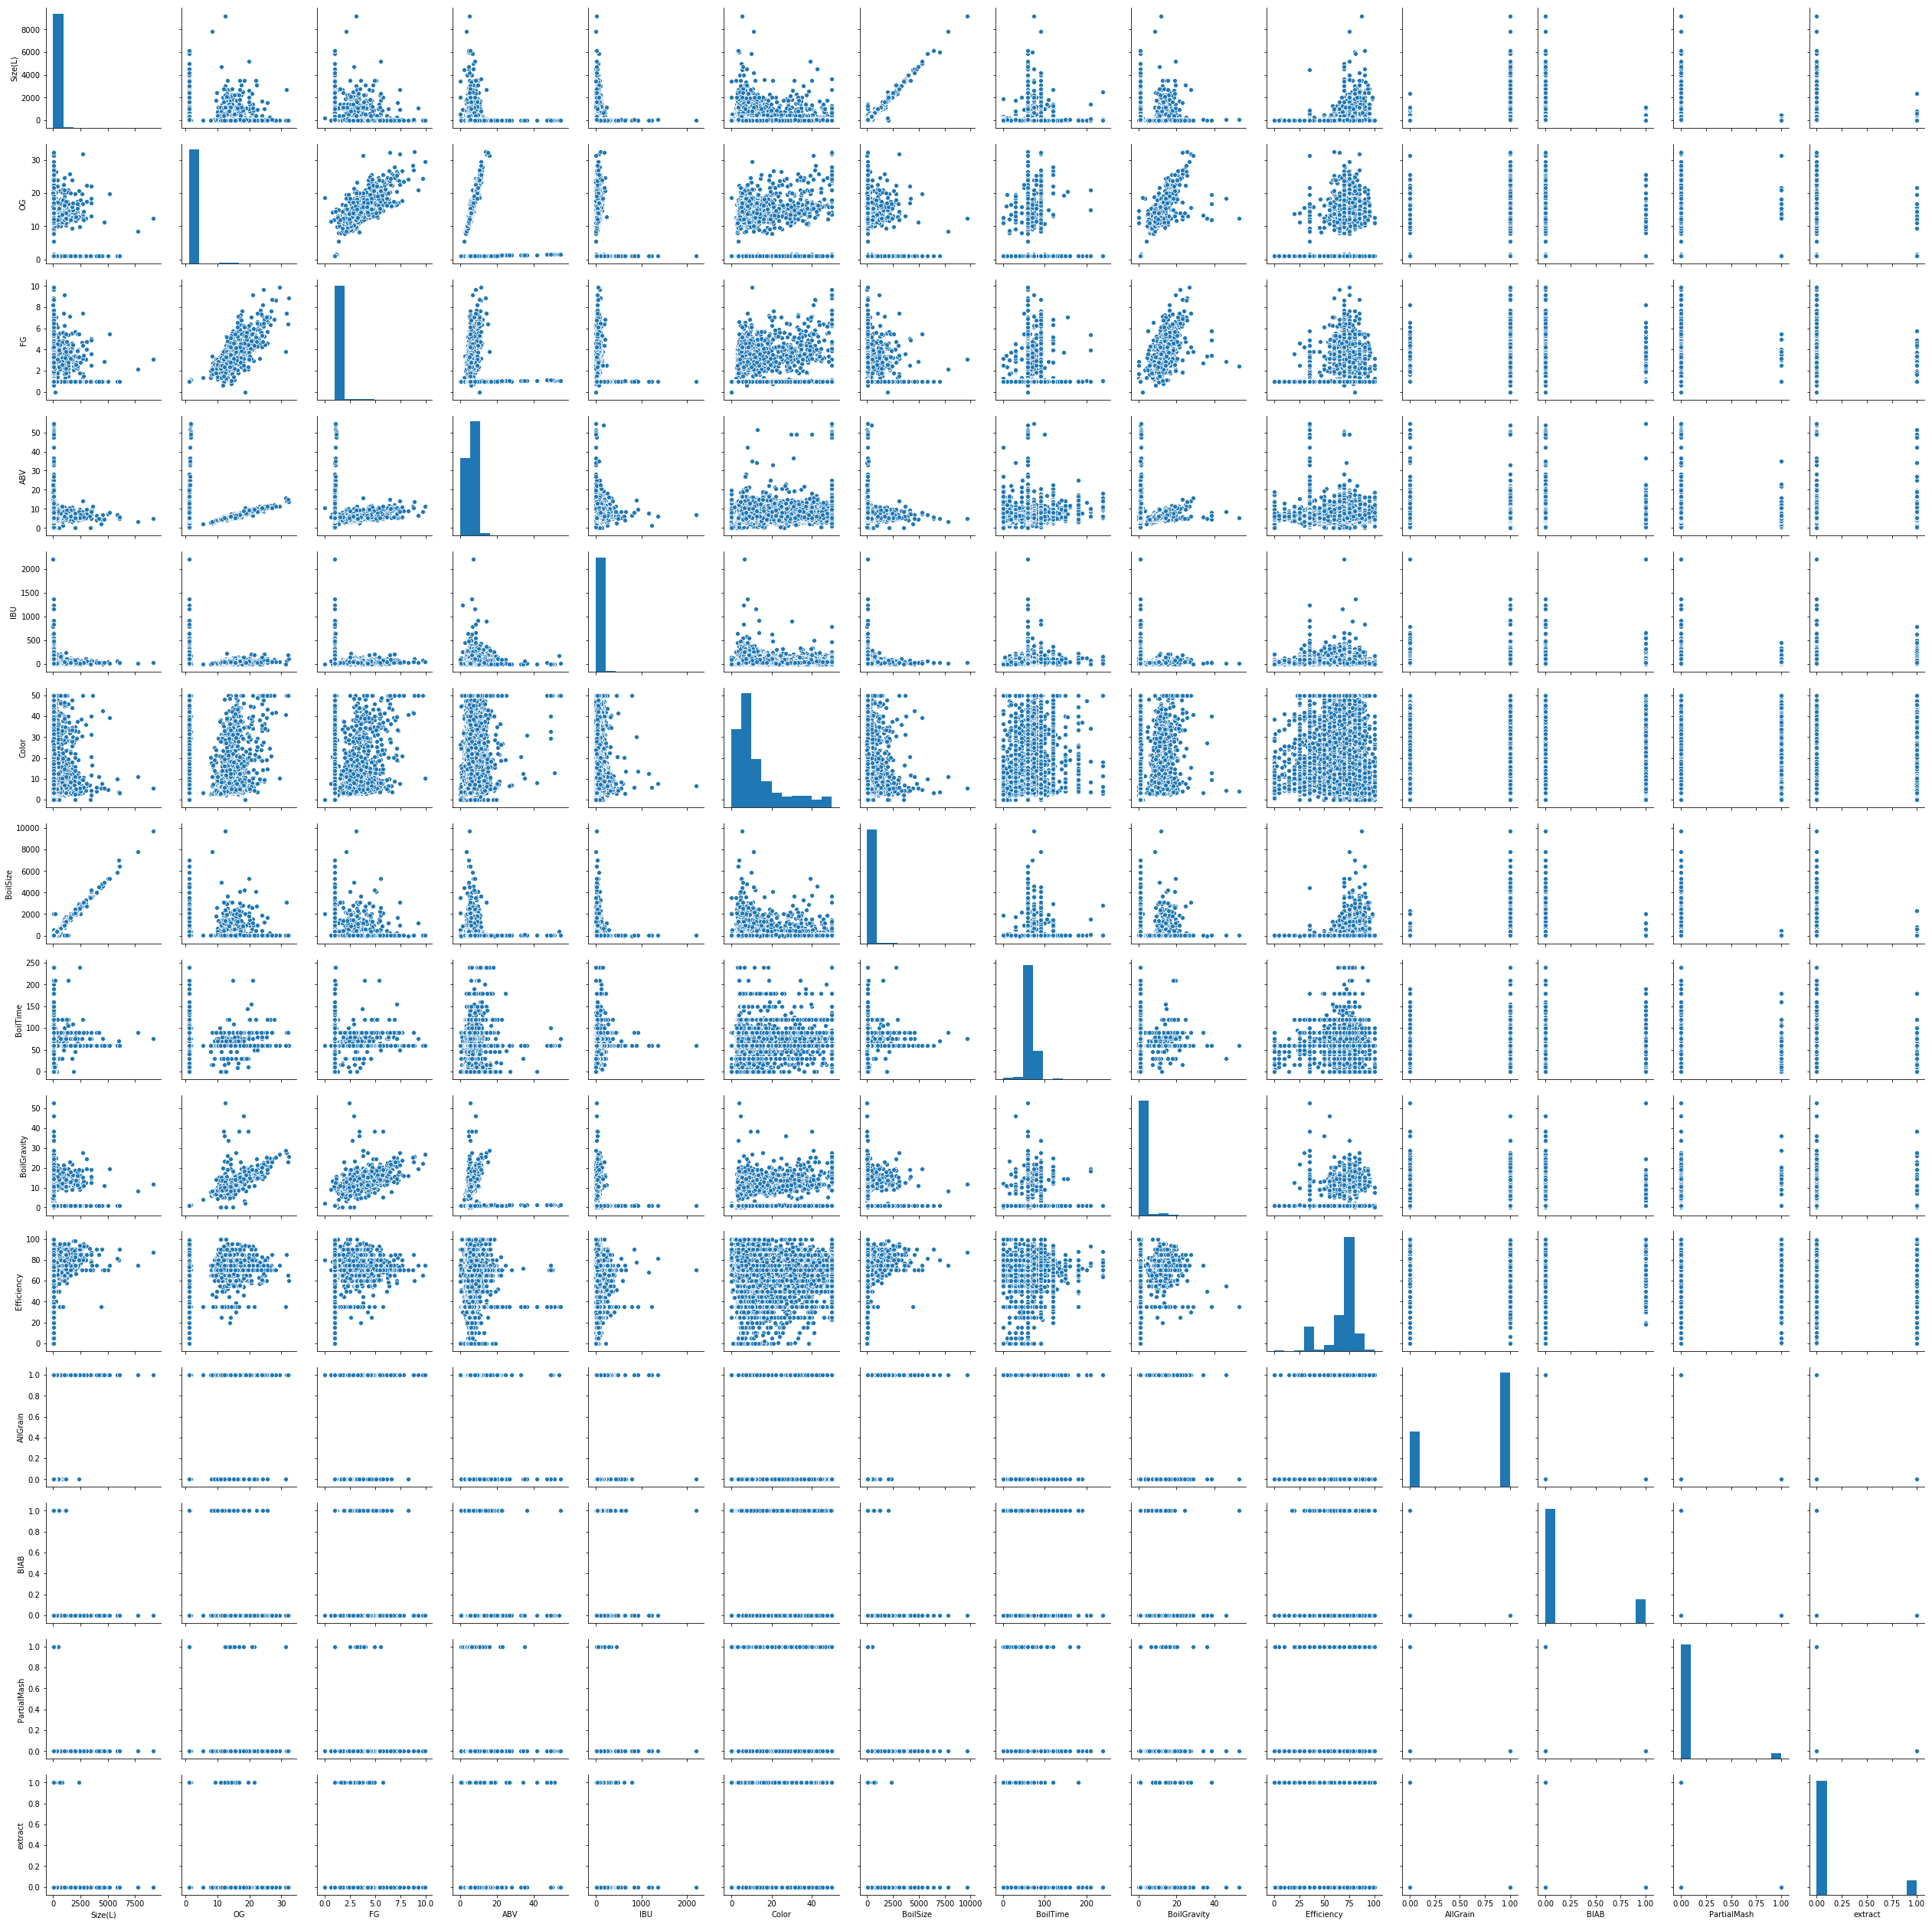

In [314]:
sns.pairplot(train_df)#, hue = 'Style')

In [315]:
model_lg = LogisticRegression(C = 1)

In [316]:
std_scale = StandardScaler()

In [317]:
X_train_scaled = std_scale.fit_transform(X_train)

In [318]:
model_lg.fit(X_train_scaled, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [319]:
lg_pred = model_lg.predict(X_test)

In [320]:
lg_pred

array(['Imperial Stout', 'Piwo Grodziskie', 'North German Altbier', ...,
       'North German Altbier', 'Piwo Grodziskie', 'Imperial Stout'],
      dtype=object)

In [321]:
model_lg.score(X_train_scaled, y_train)

0.21573712039869533

In [322]:
model_lg.score(X_test, y_test)

0.05242011722442806

In [100]:
beer_data.Name.head(10)

0                                Vanilla Cream Ale
1                      Southern Tier Pumking clone
4                  Bakke Brygg Belgisk Blonde 50 l
5                     Sierra Nevada Pale Ale Clone
7     Spotted Clown (New Glarus Spotted Cow clone)
8                         Chocolate Vanilla Porter
9                               Mango Habanero IPA
10                       Bakke Brygg HveteIPA 25 L
13                       Sam Adams Rebel IPA Clone
14                                       White IPA
Name: Name, dtype: object

In [134]:
goose_island_df = beer_data[beer_data.Name.str.contains('Goose Island').fillna(False)]

In [146]:
goose_island_df.to_csv('goose_island.csv', index = False, sep = ',')

In [139]:
west_cost_df = beer_data[beer_data.Name.str.contains('West Coast').fillna(False)]

In [145]:
heady_topper_df = beer_data[beer_data.Name.str.contains('Heady Topper').fillna(False)]

In [147]:
heady_topper_df.to_csv('heady_topper.csv', index = False, sep = ',')